/Users/Andrew/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


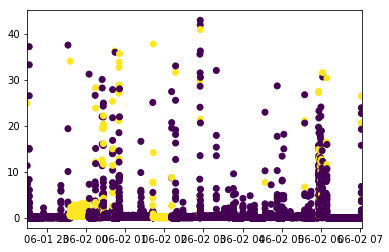

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


def getFeatures(fileName):
    df = pd.read_csv(fileName, index_col='datetime')

    # arm angle calculation using accelerometer data
    df['angle'] = 180 / np.pi * np.arctan(df['wearable-xl1-z'] / np.sqrt(np.square(df['wearable-xl1-x']) + np.square(df['wearable-xl1-z'])))

    # get only interesting columns
    df = df[['angle', 'wearable-mag-xl1']]

    # remove NaN values
    df = df.dropna()

    # convert index to DatetimeIndex
    df.index = pd.DatetimeIndex(df.index)


    # resample data within interval given in resampleInterval ('1S' = 1 second intervals)
    resampleInterval = '1S'
    minimum = df.resample(resampleInterval).min()
    maximum = df.resample(resampleInterval).max()
    mean = df.resample(resampleInterval).mean()
    std = df.resample(resampleInterval).std()
    summ = df.resample(resampleInterval).sum()

    # stack features intu np matrix
    # format: [angMin, magMin, angMax, magMax, angMean, magMean, angStd, magStd, angSum, magSum]
#     features = np.hstack((minimum.as_matrix(), maximum.as_matrix()))


    # place data into Dataframe
    minimum.rename(columns={'angle': 'angle min'}, inplace=True)
    maximum.rename(columns={'angle': 'angle max'}, inplace=True)
    mean.rename(columns={'angle': 'angle mean'}, inplace=True)
    std.rename(columns={'angle': 'angle std'}, inplace=True)
    summ.rename(columns={'angle': 'angle sum'}, inplace=True)

    features = [minimum, maximum, mean, std, summ]
    features = pd.concat(features, axis=1)
    
    return [features, std]

[features, std] = getFeatures('data_01.csv')

label = KMeans(n_clusters=2, random_state=10).fit_predict(features)

plt.scatter(std.index, std['angle std'], c=label)
plt.xlim(std.index[0], std.index[-1])
plt.show()

Timestamp('2016-06-02 07:02:30', freq='S')